In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'FlexVi'))
sys.path.append(opj(CODE_DIR, 'kacomponents'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from matplotlib import pyplot as plt

In [17]:
from epypes import dag

from flexvi.core.images import open_image
from flexvi.core.chessboard import find_chessboard_corners_on_image

In [18]:
cb_G = dag.ComputationalGraph(
    func_dict = {
        'open': open_image,
        'find_corners': find_chessboard_corners_on_image
    }, 
    func_io = {
        'open': (('im_fname', 'gray'), 'image'),
        'find_corners': (('image', 'pattern_size'), 'corners')
    }
)

cb_runner = dag.CompGraphRunner(cb_G)

imfile = opj(CODE_DIR, 'DATA', 'IMG/calib/amct', 'cam0_image00013.tif')

cb_runner.freeze_token('im_fname', imfile)
cb_runner.freeze_token('pattern_size', (8, 5))
cb_runner.freeze_token('gray', True)

cb_runner.run()

In [19]:
#cb_runner.token_value('corners')

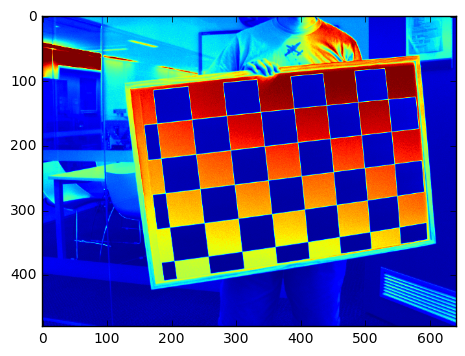

In [20]:
plt.imshow(cb_runner.token_value('image'))